# Premier League Summer Transfer: Analysis of the Big6

**Problem Statement:**

Mr. X is a board member of the Premier League. He has seen how leagues in different countires have become one sided and therefore has no thrill over who is going to win their league. 
His concern is the rewarding system in the premier league where the top finishing teams get huge reward as money while bottom struggling teams recieves so little as compared to inflated transfer market. As a result, the lower teams do not have adequate money to buy players while the top teams are so rich that they can match any fees demanded by the selling clubs. This might cause the Big 6 of the PL(Manchester United, Manchester City, Liverpool, Arsenal, Chelsea and Tottenham) to be the only contenders, and therefore might become less competitive league. 
After the Summer Transfer Market of 2022 He wants to know the spending of the Big 6 as compared to rest of the league so he can put his point of revising the reward system to maintain a healthy competition in the league.



The transfer dataset has been collected from Kaggle(https://www.kaggle.com/datasets/davidmolina/football-summer-market-2022) and the league table was downloaded from sprotsref.

**The transfers are of June-September 2022. The league table is upto 24th January 2023.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
from matplotlib import font_manager

In [2]:
summer_data = pd.read_csv('2022_2023_football_summer_transfers.csv') 
pd.set_option('display.max_rows', None)
league_table = pd.read_csv('premier_league_table_24jan2023.csv') 


# EDA :

In [3]:
summer_data.describe()

,age,market_value(million_euro)
count,2000.00000,2000.000000
mean,25.18700,5.129930
std,3.86141,8.531266
min,16.00000,0.050000
25%,22.00000,1.000000
50%,25.00000,2.000000
75%,28.00000,5.000000
max,37.00000,150.000000


In [4]:
summer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        2000 non-null   object 
 1   position                    2000 non-null   object 
 2   age                         2000 non-null   int64  
 3   market_value(million_euro)  2000 non-null   float64
 4   country_from                1999 non-null   object 
 5   league_from                 2000 non-null   object 
 6   club_from                   2000 non-null   object 
 7   country_to                  2000 non-null   object 
 8   league_to                   2000 non-null   object 
 9   club_to                     2000 non-null   object 
 10  fee(million_euro)           2000 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 172.0+ KB


We have the column fee as object because of 'free transfer' and 'loan transfer' types.

In [5]:
summer_data['fee(million_euro)'].unique()

array(['60', '95', '80', '75', '70', '67', '56', '32', '8', '65', '40',
       '50', '58', '57', '23', '52', '49', '18', 'free transfer', '45',
       '42', '28', '41', '38', '31', '37', '36', '35', '30', '29', '20',
       '17', '15', '5', '0.5', 'loan transfer', '12', '3', '26', '25',
       '11', '4', '24', '22', '21', '14', '13', '9', '6', '1', '19', '16',
       '10', '7', '2', '0.9', '0.4', '0.2', '?', '0.75', '0.136', '0.7',
       '0.25', '0.3', '0.955', '0.6', '0.42', '0.51', '0.15', '0.025',
       '0.818', '0.455', '0.39', '0.33', '0.98', '0.546', '0.1', '0.465',
       '0.8', '0.841', '0.65', '0.205', '0.196', '0.05', '0.35', '0.87',
       '0.672', '0.55', '0.364', '0.273', '0.19', '0.075', '0.285',
       '0.49', '0.48', '0.12', '0.96', '0.85', '0.67', '0.58', '0.495',
       '0.45'], dtype=object)

In [6]:
summer_data.isnull().sum()

name                          0
position                      0
age                           0
market_value(million_euro)    0
country_from                  1
league_from                   0
club_from                     0
country_to                    0
league_to                     0
club_to                       0
fee(million_euro)             0
dtype: int64

# Teamwise Dataframes:

In [7]:
# premier_league


premierleague = summer_data[((summer_data['league_to']=='Premier League') & (summer_data['country_to']=='England') | 
                              (summer_data['league_from']=='Premier League') & (summer_data['country_from']=='England') )]
premierleague.reset_index(drop=True,inplace=True)

pl_arrivals = summer_data[(summer_data['league_to']=='Premier League') & 
                             (summer_data['league_from']!='Premier League')].copy()

pl_departure = summer_data[(summer_data['league_from']=='Premier League') & 
                             (summer_data['league_to']!='Premier League')].copy()

pl_loan = premierleague[premierleague['fee(million_euro)']=='loan transfer'].copy()
pl_free = premierleague[premierleague['fee(million_euro)']=='free transfer'].copy()

pl_loan_in = pl_loan[pl_loan['league_to']=='Premier League'].copy()
pl_free_in = pl_free[pl_free['league_to']=='Premier League'].copy()

pl_loan_out = pl_loan[pl_loan['league_from']=='Premier League'].copy()
pl_free_out = pl_free[pl_free['league_from']=='Premier League'].copy()

pl_spendings = premierleague[premierleague['league_to']=='Premier League'].copy()
pl_spendings['fee(million_euro)'] = pd.to_numeric(pl_spendings['fee(million_euro)'],errors='coerce')

pl_sales = premierleague[premierleague['league_from']=='Premier League'].copy()
pl_sales['fee(million_euro)'] = pd.to_numeric(pl_sales['fee(million_euro)'],errors='coerce')

In [8]:
#Manchester City:

mcfc= premierleague[(premierleague['club_to']=='Manchester City') | (premierleague['club_from']=='Manchester City')].copy()
mcfc.reset_index(drop=True,inplace=True)
# mcfc
mcfc_arrivals = mcfc[mcfc['club_to']=='Manchester City'].copy()
mcfc_departures = mcfc[mcfc['club_from']=='Manchester City'].copy()
mcfc_loan = mcfc[mcfc['fee(million_euro)']=='loan transfer'].copy()
mcfc_free = mcfc[mcfc['fee(million_euro)']=='free transfer'].copy()
mcfc_loan_in = mcfc_loan[mcfc_loan['club_to']=='Manchester City'].copy()
mcfc_loan_out = mcfc_loan[mcfc_loan['club_from']=='Manchester City'].copy()
mcfc_free_in = mcfc_free[mcfc_free['club_to']=='Manchester City'].copy()
mcfc_free_out = mcfc_free[mcfc_free['club_from']=='Manchester City'].copy()

mcfc_spendings = mcfc[mcfc['club_to']=='Manchester City'].copy()
mcfc_spendings['fee(million_euro)'] = pd.to_numeric(mcfc_spendings['fee(million_euro)'],errors='coerce')
mcfc_sales = mcfc[mcfc['club_from']=='Manchester City'].copy()
mcfc_sales['fee(million_euro)'] = pd.to_numeric(mcfc_sales['fee(million_euro)'],errors='coerce')


#Manchester United:

mufc = premierleague[(premierleague['club_to']=='Manchester United') | (premierleague['club_from']=='Manchester United')].copy()
mufc.reset_index(drop=True,inplace=True)
# mufc
mufc_arrivals = mufc[mufc['club_to']=='Manchester United'].copy()
mufc_departures = mufc[mufc['club_from']=='Manchester United'].copy()
mufc_loan = mufc[mufc['fee(million_euro)']=='loan transfer'].copy()
mufc_free = mufc[mufc['fee(million_euro)']=='free transfer'].copy()
mufc_loan_in = mufc_loan[mufc_loan['club_to']=='Manchester United'].copy()
mufc_loan_out = mufc_loan[mufc_loan['club_from']=='Manchester United'].copy()
mufc_free_in = mufc_free[mufc_free['club_to']=='Manchester United'].copy()
mufc_free_out = mufc_free[mufc_free['club_from']=='Manchester United'].copy()

mufc_spendings = mufc[mufc['club_to']=='Manchester United'].copy()
mufc_spendings['fee(million_euro)'] = pd.to_numeric(mufc_spendings['fee(million_euro)'],errors='coerce')
mufc_sales = mufc[mufc['club_from']=='Manchester United'].copy()
mufc_sales['fee(million_euro)'] = pd.to_numeric(mufc_sales['fee(million_euro)'],errors='coerce')

#Liverpool

lfc = premierleague[(premierleague['club_to']=='Liverpool FC') | (premierleague['club_from']=='Liverpool FC')].copy()
lfc.reset_index(drop=True,inplace=True)
# lfc
lfc_arrivals = lfc[lfc['club_to']=='Liverpool FC'].copy()
lfc_departures = lfc[lfc['club_from']=='Liverpool FC'].copy()
lfc_loan = lfc[lfc['fee(million_euro)']=='loan transfer'].copy()
lfc_free = lfc[lfc['fee(million_euro)']=='free transfer'].copy()
lfc_loan_in = lfc_loan[lfc_loan['club_to']=='Liverpool FC'].copy()
lfc_loan_out = lfc_loan[lfc_loan['club_from']=='Liverpool FC'].copy()
lfc_free_in = lfc_free[lfc_free['club_to']=='Liverpool FC'].copy()
lfc_free_out = lfc_free[lfc_free['club_from']=='Liverpool FC'].copy()

lfc_spendings = lfc[lfc['club_to']=='Liverpool FC'].copy()
lfc_spendings['fee(million_euro)'] = pd.to_numeric(lfc_spendings['fee(million_euro)'],errors='coerce')
lfc_sales = lfc[lfc['club_from']=='Liverpool FC'].copy()
lfc_sales['fee(million_euro)'] = pd.to_numeric(lfc_sales['fee(million_euro)'],errors='coerce')

#Arsenal:

afc = premierleague[(premierleague['club_to']=='Arsenal FC') | (premierleague['club_from']=='Arsenal FC')].copy()
afc.reset_index(drop=True,inplace=True)
# afc
afc_arrivals = afc[afc['club_to']=='Arsenal FC'].copy()
afc_departures = afc[afc['club_from']=='Arsenal FC'].copy()
afc_loan = afc[afc['fee(million_euro)']=='loan transfer'].copy()
afc_free = afc[afc['fee(million_euro)']=='free transfer'].copy()
afc_loan_in = afc_loan[afc_loan['club_to']=='Arsenal FC'].copy()
afc_loan_out = afc_loan[afc_loan['club_from']=='Arsenal FC'].copy()
afc_free_in = afc_free[afc_free['club_to']=='Arsenal FC'].copy()
afc_free_out = afc_free[afc_free['club_from']=='Arsenal FC'].copy()

afc_spendings = afc[afc['club_to']=='Arsenal FC'].copy()
afc_spendings['fee(million_euro)'] = pd.to_numeric(afc_spendings['fee(million_euro)'],errors='coerce')
afc_sales = afc[afc['club_from']=='Arsenal FC'].copy()
afc_sales['fee(million_euro)'] = pd.to_numeric(afc_sales['fee(million_euro)'],errors='coerce')

#Chelsea:

cfc = premierleague[(premierleague['club_to']=='Chelsea FC') | (premierleague['club_from']=='Chelsea FC')].copy()
cfc.reset_index(drop=True,inplace=True)
# cfc
cfc_arrivals = cfc[cfc['club_to']=='Chelsea FC'].copy()
cfc_departures = cfc[cfc['club_from']=='Chelsea FC'].copy()
cfc_loan = cfc[cfc['fee(million_euro)']=='loan transfer'].copy()
cfc_free = cfc[cfc['fee(million_euro)']=='free transfer'].copy()
cfc_loan_in = cfc_loan[cfc_loan['club_to']=='Chelsea FC'].copy()
cfc_loan_out = cfc_loan[cfc_loan['club_from']=='Chelsea FC'].copy()
cfc_free_in = cfc_free[cfc_free['club_to']=='Chelsea FC'].copy()
cfc_free_out = cfc_free[cfc_free['club_from']=='Chelsea FC'].copy()

cfc_spendings = cfc[cfc['club_to']=='Chelsea FC'].copy()
cfc_spendings['fee(million_euro)'] = pd.to_numeric(cfc_spendings['fee(million_euro)'],errors='coerce')
cfc_sales = cfc[cfc['club_from']=='Chelsea FC'].copy()
cfc_sales['fee(million_euro)'] = pd.to_numeric(cfc_sales['fee(million_euro)'],errors='coerce')

#Tottehnham:

thfc = premierleague[(premierleague['club_to']=='Tottenham Hotspur') | (premierleague['club_from']=='Tottenham Hotspur')].copy()
thfc.reset_index(drop=True,inplace=True)
# thfc
thfc_arrivals = thfc[thfc['club_to']=='Tottenham Hotspur'].copy()
thfc_departures = thfc[thfc['club_from']=='Tottenham Hotspur'].copy()
thfc_loan = thfc[thfc['fee(million_euro)']=='loan transfer'].copy()
thfc_free = thfc[thfc['fee(million_euro)']=='free transfer'].copy()
thfc_loan_in = thfc_loan[thfc_loan['club_to']=='Tottenham Hotspur'].copy()
thfc_loan_out = thfc_loan[thfc_loan['club_from']=='Tottenham Hotspur'].copy()
thfc_free_in = thfc_free[thfc_free['club_to']=='Tottenham Hotspur'].copy()
thfc_free_out = thfc_free[thfc_free['club_from']=='Tottenham Hotspur'].copy()

thfc_spendings = thfc[thfc['club_to']=='Tottenham Hotspur'].copy()
thfc_spendings['fee(million_euro)'] = pd.to_numeric(thfc_spendings['fee(million_euro)'],errors='coerce')
thfc_sales = thfc[thfc['club_from']=='Tottenham Hotspur'].copy()
thfc_sales['fee(million_euro)'] = pd.to_numeric(thfc_sales['fee(million_euro)'],errors='coerce')

**Percent spending and sales:**

In [9]:
total_pl_spendings = pl_spendings['fee(million_euro)'].sum()
mcfc_percent_spendings = round(mcfc_spendings['fee(million_euro)'].sum()*100/total_pl_spendings,3)
mufc_percent_spendings = round(mufc_spendings['fee(million_euro)'].sum()*100/total_pl_spendings,3)
lfc_percent_spendings = round(lfc_spendings['fee(million_euro)'].sum()*100/total_pl_spendings,3)
afc_percent_spendings = round(afc_spendings['fee(million_euro)'].sum()*100/total_pl_spendings,3)
cfc_percent_spendings = round(cfc_spendings['fee(million_euro)'].sum()*100/total_pl_spendings,3)
thfc_percent_spendings = round(thfc_spendings['fee(million_euro)'].sum()*100/total_pl_spendings,3)


total_pl_sales = pl_sales['fee(million_euro)'].sum()
mcfc_percent_sales = round(mcfc_sales['fee(million_euro)'].sum()*100/total_pl_sales,3)
mufc_percent_sales = round(mufc_sales['fee(million_euro)'].sum()*100/total_pl_sales,3)
lfc_percent_sales = round(lfc_sales['fee(million_euro)'].sum()*100/total_pl_sales,3)
afc_percent_sales = round(afc_sales['fee(million_euro)'].sum()*100/total_pl_sales,3)
cfc_percent_sales = round(cfc_sales['fee(million_euro)'].sum()*100/total_pl_sales,3)
thfc_percent_sales = round(thfc_sales['fee(million_euro)'].sum()*100/total_pl_sales,3)

In [10]:
data_1= {
    'Team' : ['Manchester City','Manchester United','Liverpool','Arsenal','Chelsea','Tottenham'],
    'Number of players bought' : [mcfc_arrivals.shape[0],mufc_arrivals.shape[0],lfc_arrivals.shape[0],afc_arrivals.shape[0],cfc_arrivals.shape[0],thfc_arrivals.shape[0]],
    'Number of players sold' : [mcfc_departures.shape[0],mufc_departures.shape[0],lfc_departures.shape[0],afc_departures.shape[0],cfc_departures.shape[0],thfc_departures.shape[0]],
    'Total Summer Spending (million euro)':
        [mcfc_spendings['fee(million_euro)'].sum(),mufc_spendings['fee(million_euro)'].sum(),lfc_spendings['fee(million_euro)'].sum(),afc_spendings['fee(million_euro)'].sum(),cfc_spendings['fee(million_euro)'].sum(),thfc_spendings['fee(million_euro)'].sum()],
    'Total Summer Sales(million euro)':
        [mcfc_sales['fee(million_euro)'].sum(),mufc_sales['fee(million_euro)'].sum(),lfc_sales['fee(million_euro)'].sum(),afc_sales['fee(million_euro)'].sum(),cfc_sales['fee(million_euro)'].sum(),thfc_sales['fee(million_euro)'].sum()],
    '% of PL spendings' : [mcfc_percent_spendings,mufc_percent_spendings,lfc_percent_spendings,afc_percent_spendings,cfc_percent_spendings,thfc_percent_spendings],
    '% of PL sales' : [mcfc_percent_sales,mufc_percent_sales,lfc_percent_sales,afc_percent_sales,cfc_percent_sales,thfc_percent_sales],
      }
table_1 = pd.DataFrame(data_1)

In [11]:
table_1['Net Profit or Loss'] = table_1['Total Summer Sales(million euro)']-table_1['Total Summer Spending (million euro)']
table_1['Profit/Loss'] = table_1['Net Profit or Loss'].apply(lambda x: 'Profit' if x>0 else 'Loss')

In [12]:
table_1

,Team,Number of players bought,Number of players sold,Total Summer Spending (million euro),Total Summer Sales(million euro),% of PL spendings,% of PL sales,Net Profit or Loss,Profit/Loss
0,Manchester City,5,13,139.0,159.0,6.282,18.099,20.0,Profit
1,Manchester United,6,12,239.0,11.0,10.802,1.252,-228.0,Loss
2,Liverpool,4,10,88.0,80.0,3.977,9.106,-8.0,Loss
3,Arsenal,5,12,131.0,23.0,5.921,2.618,-108.0,Loss
4,Chelsea,8,16,281.0,57.0,12.701,6.488,-224.0,Loss
5,Tottenham,8,8,169.0,38.5,7.638,4.382,-130.5,Loss


**League Table as of 31st January 2023:**

In [13]:
league_table.head()

,Pos,Team,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Arsenal,19,16,2,1,45,16,29,50,2.63,37.3,17.0,20.3,1.07,W W D W W,"60,175",Martin Ødegaard - 8,Aaron Ramsdale,NaN
1,2,Manchester City,20,14,3,3,53,20,33,45,2.25,41.4,15.6,25.8,1.29,D W L W W,"53,185",Erling Haaland - 25,Ederson,NaN
2,3,Newcastle Utd,20,10,9,1,33,11,22,39,1.95,32.8,17.7,15.1,0.75,W D D W D,"52,187",Miguel Almirón - 9,Nick Pope,NaN
3,4,Manchester Utd,20,12,3,5,32,25,7,39,1.95,29.6,23.5,6.0,0.30,W W W D L,"73,872",Marcus Rashford - 9,David de Gea,NaN
4,5,Tottenham,21,11,3,7,40,31,9,36,1.71,30.5,25.5,5.0,0.24,L W L L W,"61,686",Harry Kane - 16,Hugo Lloris,NaN


In [14]:
league_table.columns

Index(['Pos', 'Team', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP',
       'xG', 'xGA', 'xGD', 'xGD/90', 'Last 5', 'Attendance', 'Top Team Scorer',
       'Goalkeeper', 'Notes'],
      dtype='object')

In [15]:
# Dropping unneccesary columns:

league_table.drop(['Last 5', 'Attendance', 'Top Team Scorer','Goalkeeper', 'Notes'],axis=1,inplace=True)

In [16]:
league_table['GF/MP'] = round((league_table['GF']/league_table['MP']),3)
league_table['GA/MP'] = round((league_table['GA']/league_table['MP']),3)
league_table.head()


,Pos,Team,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,GF/MP,GA/MP
0,1,Arsenal,19,16,2,1,45,16,29,50,2.63,37.3,17.0,20.3,1.07,2.368,0.842
1,2,Manchester City,20,14,3,3,53,20,33,45,2.25,41.4,15.6,25.8,1.29,2.650,1.000
2,3,Newcastle Utd,20,10,9,1,33,11,22,39,1.95,32.8,17.7,15.1,0.75,1.650,0.550
3,4,Manchester Utd,20,12,3,5,32,25,7,39,1.95,29.6,23.5,6.0,0.30,1.600,1.250
4,5,Tottenham,21,11,3,7,40,31,9,36,1.71,30.5,25.5,5.0,0.24,1.905,1.476


# Graphical representation:

In [25]:
table_1

,Team,Number of players bought,Number of players sold,Total Summer Spending (million euro),Total Summer Sales(million euro),% of PL spendings,% of PL sales,Net Profit or Loss,Profit/Loss
0,Manchester City,5,13,139.0,159.0,6.282,18.099,20.0,Profit
1,Manchester United,6,12,239.0,11.0,10.802,1.252,-228.0,Loss
2,Liverpool,4,10,88.0,80.0,3.977,9.106,-8.0,Loss
3,Arsenal,5,12,131.0,23.0,5.921,2.618,-108.0,Loss
4,Chelsea,8,16,281.0,57.0,12.701,6.488,-224.0,Loss
5,Tottenham,8,8,169.0,38.5,7.638,4.382,-130.5,Loss


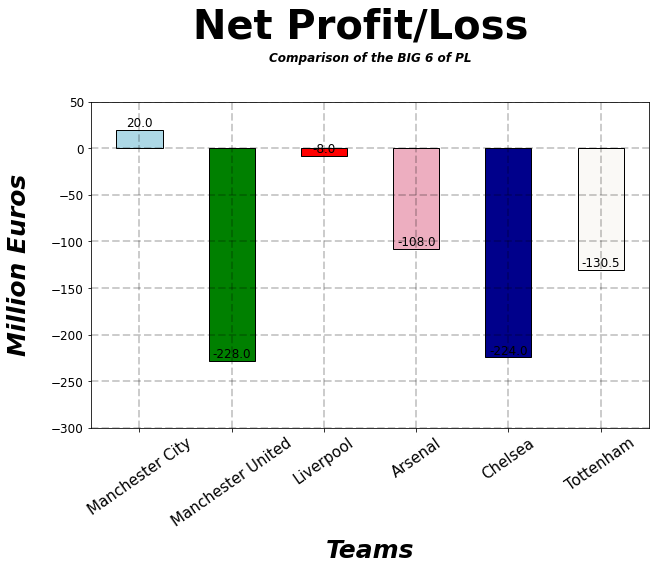

In [109]:
x=table_1['Team']
y = table_1['Net Profit or Loss']


# style.use('default')

fig=plt.figure()
ax=plt.axes()

fig.set_figwidth(10)
fig.set_figheight(6)

# ax.set_facecolor('#D3D3D3')#background of the graph

teams = table_1['Team']
color = ['#ADD8E6','green','red','#EDAEC0','#00008B','#FAF9F6']


plt.bar(x,y,color=color,edgecolor = 'black',width=0.5,alpha=1,align='center')

#supertitle
plt.suptitle("Net Profit/Loss",fontsize=40,y=1.1,fontweight='bold')

plt.title('Comparison of the BIG 6 of PL',fontsize=12,pad=40,style='italic',fontweight='bold',loc='center')

plt.xticks(x,fontsize=15,rotation=35)
plt.yticks(np.arange(-300,100,50),fontsize=12)

plt.xlabel('Teams',fontsize=25,labelpad=10,fontweight='bold',style='italic')
plt.ylabel('Million Euros',fontsize=25,labelpad=20,fontweight='bold',style='italic')


for i in range(6):
    plt.text(x[i],y[i],y[i],ha='center',va='bottom',size=12)




plt.grid(axis='both',ls='dashed',lw=2,color='black',alpha=0.2)
plt.show()


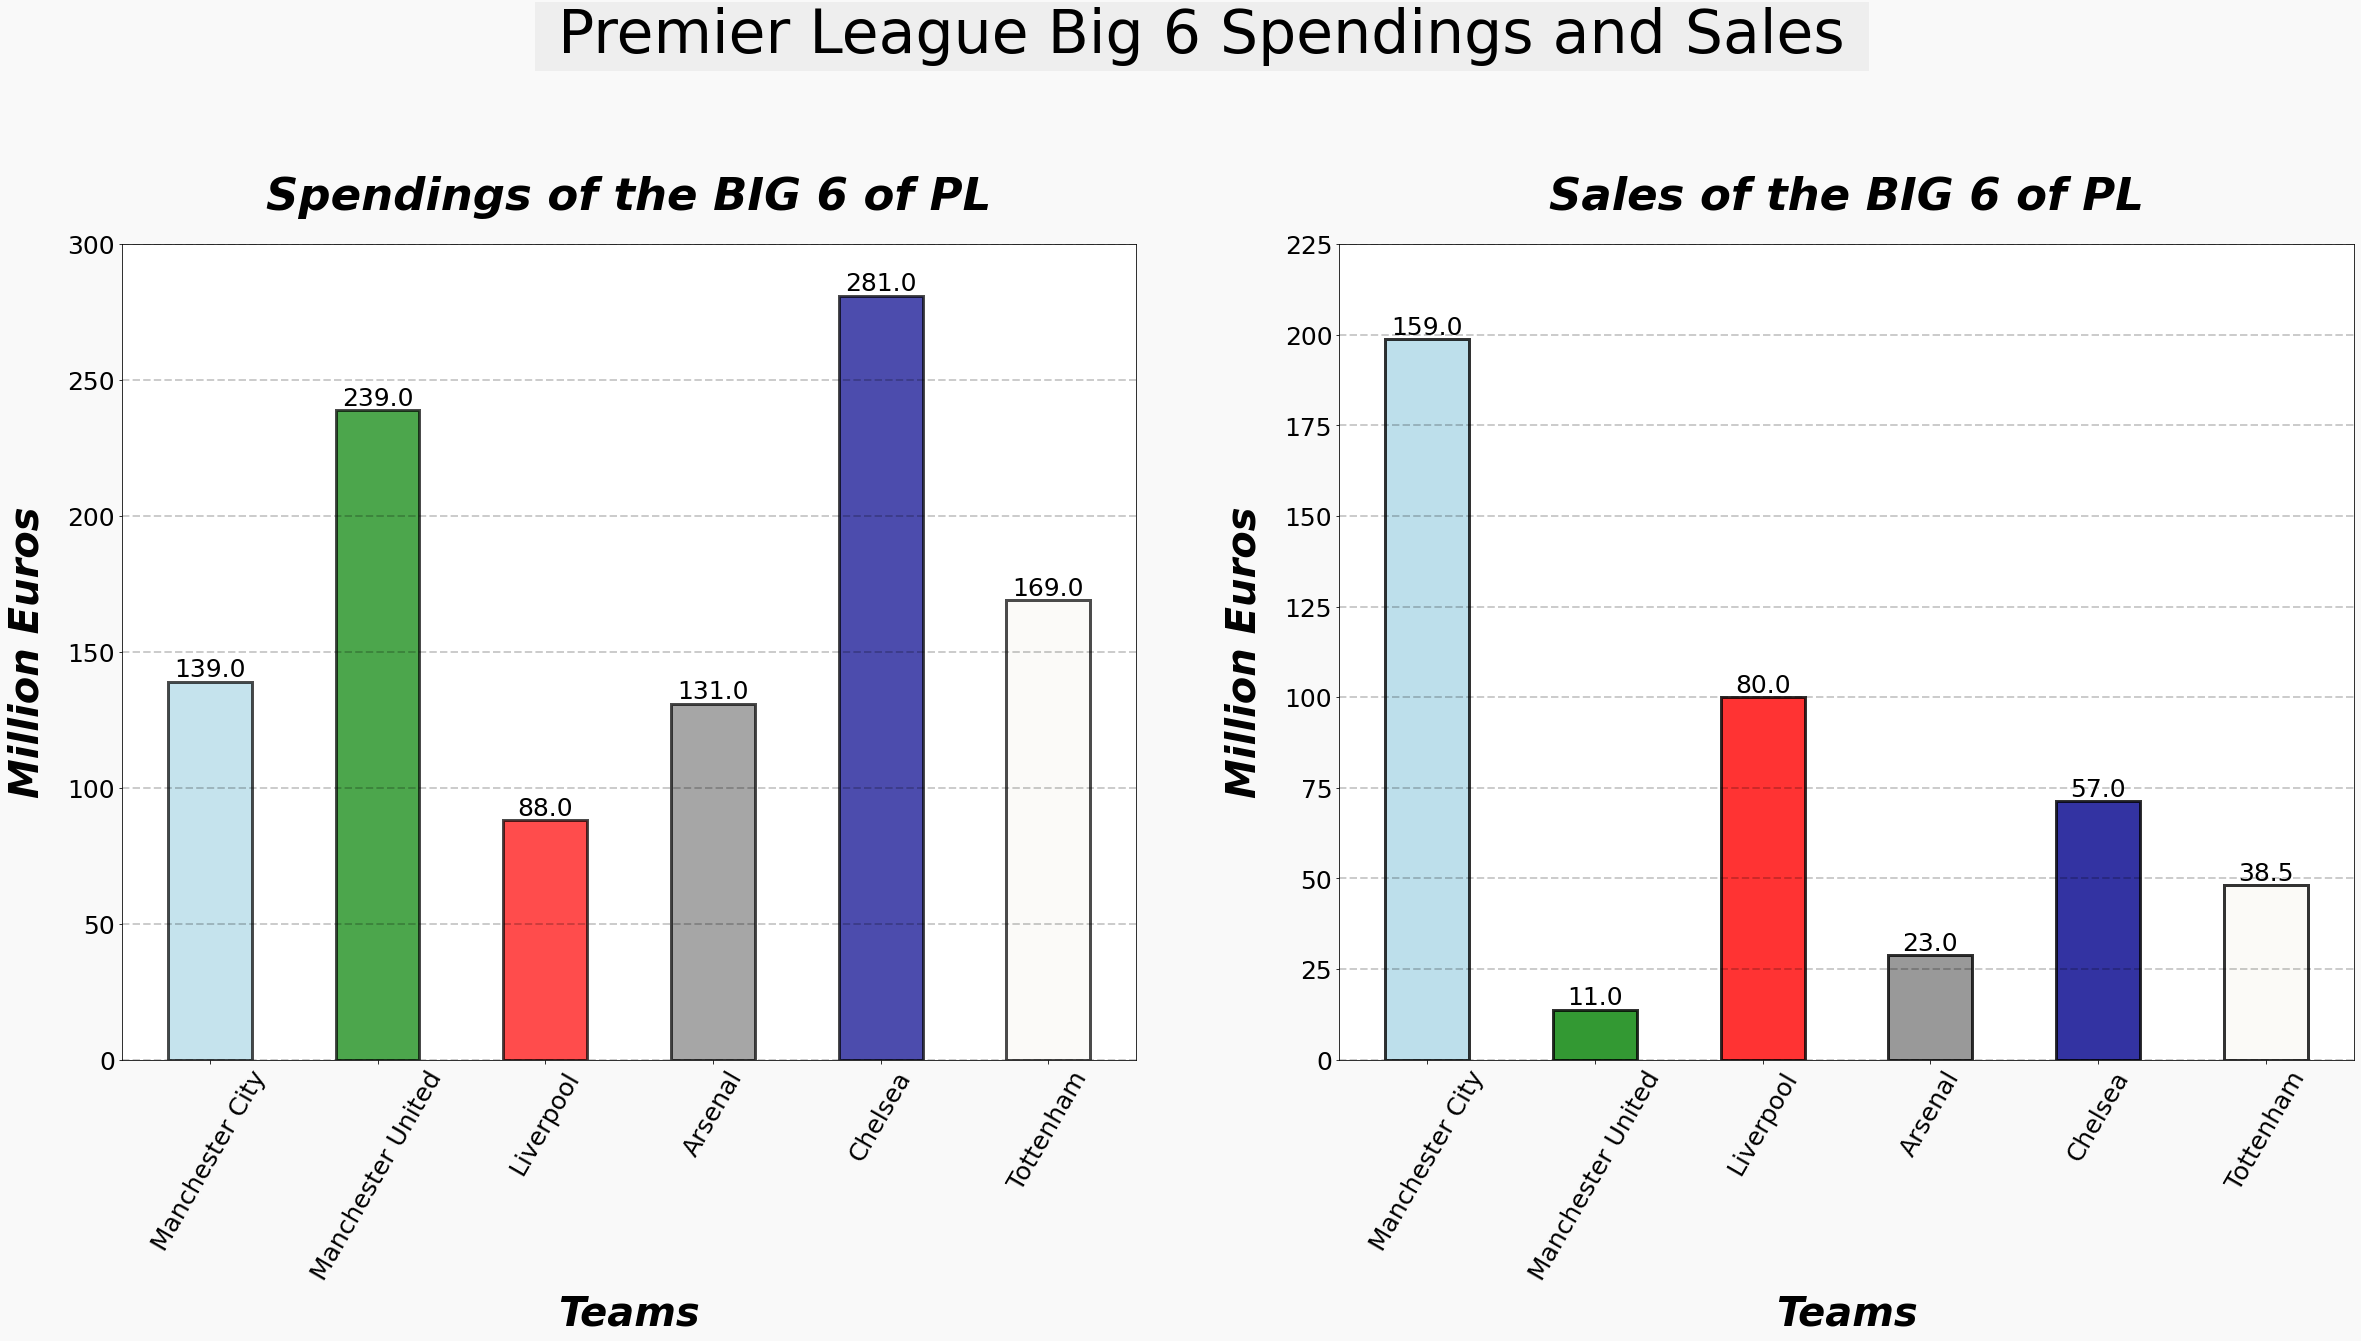

In [121]:
fig,ax = plt.subplots(1,2)
fig.set_figwidth(40)
fig.set_figheight(15)
plt.draw()

fig.set_facecolor('#f9f9f9') #inverse of Graph
fig.suptitle(' Premier League Big 6 Spendings and Sales ',y=1.1, fontsize=60,backgroundcolor='#eeeeee')

#Subplot 1:

x = table_1['Team']
y = table_1['Total Summer Spending (million euro)']
teams = table_1['Team']
color = ['#ADD8E6','green','red','grey','#00008B','#FAF9F6']


# ax[0].set_facecolor('#fffff0')#background of the graph

ax[0].bar(x,y,color=color,edgecolor = 'black',width=0.5,alpha=0.7,align='center',lw=3)

ax[0].set_title('Spendings of the BIG 6 of PL',fontsize=45,pad=35,style='italic',color='black',
          backgroundcolor='#f9f9f9',fontweight='bold',loc='center')


ax[0].set_xticks(ax[0].get_xticks()) #these ticks will prevent the FIxedLocater Warning.
ax[0].set_yticks(ax[0].get_yticks())

ax[0].set_xticklabels(x,rotation=60,fontsize=25)
ax[0].set_yticklabels(np.arange(0,350,50),fontsize=25)#backgroundcolor='#f6f7df'

ax[0].set_xlabel('Teams',labelpad=10,fontweight='bold',style='italic',fontsize=40)#backgroundcolor='#b6f0ed'
ax[0].set_ylabel('Million Euros',labelpad=20,fontweight='bold',style='italic',fontsize=40)#backgroundcolor='#b6f0ed'


for i in range(6):
    ax[0].text(x[i],y[i],y[i],ha='center',va='bottom',fontsize=25)
#     ax[0].text(x[i],y[i],x[i],ha='center',va='top',rotation=90,size=12)

ax[0].grid(axis='y',ls='dashed',lw=2,color='black',alpha=0.2)


#Subplot 2:

# x = comparison_1['Team']
y = table_1['Total Summer Sales(million euro)']
# teams = comparison_1['Team']
# color = ['#ADD8E6','green','red','grey','#00008B','#FAF9F6']

ax[1].bar(x,y,color=color,edgecolor = 'black',width=0.5,alpha=0.8,align='center',lw=3)

ax[1].set_title('Sales of the BIG 6 of PL',fontsize=45,pad=35,style='italic',color='black',
          backgroundcolor='#f9f9f9',fontweight='bold',loc='center')


ax[1].set_xticks(ax[1].get_xticks())
ax[1].set_yticks(ax[1].get_yticks())
ax[1].set_xticklabels(x,rotation=60,fontsize=25)
ax[1].set_yticklabels(np.arange(0,250,25),fontsize=25)

plt.xlabel('Teams',labelpad=10,fontweight='bold',style='italic',fontsize=40)
plt.ylabel('Million Euros',labelpad=20,fontweight='bold',style='italic',fontsize=40)


for i in range(6):
    plt.text(x[i],y[i],y[i],ha='center',va='bottom',fontsize=25)




plt.grid(axis='y',ls='dashed',lw=2,color='black',alpha=0.2)




plt.savefig('Bargraph_PL spendings and sales.pdf',
            facecolor='white',pad_inches=2,bbox_inches='tight')

plt.show()


In [24]:
others_spendings = total_pl_spendings - table_1['Total Summer Spending (million euro)'].sum()
others_sales = total_pl_sales-table_1['Total Summer Sales(million euro)'].sum()

table_2 = table_1.copy()
table_2.loc[len(table_2.index)]=['Others',
                                 pl_arrivals.shape[0]-table_1['Number of players bought'].sum(),
                                 pl_departure.shape[0]-table_1['Number of players sold'].sum(),
                                 others_spendings,others_sales,
                                 round(others_spendings*100/total_pl_spendings,3),
                                 round(others_sales*100/total_pl_sales,3),
                                 np.nan,
                                 np.nan]
table_2

,Team,Number of players bought,Number of players sold,Total Summer Spending (million euro),Total Summer Sales(million euro),% of PL spendings,% of PL sales,Net Profit or Loss,Profit/Loss
0,Manchester City,5,13,139.0,159.0,6.282,18.099,20.0,Profit
1,Manchester United,6,12,239.0,11.0,10.802,1.252,-228.0,Loss
2,Liverpool,4,10,88.0,80.0,3.977,9.106,-8.0,Loss
3,Arsenal,5,12,131.0,23.0,5.921,2.618,-108.0,Loss
4,Chelsea,8,16,281.0,57.0,12.701,6.488,-224.0,Loss
5,Tottenham,8,8,169.0,38.5,7.638,4.382,-130.5,Loss
6,Others,63,73,1165.5,510.0,52.678,58.054,NaN,NaN


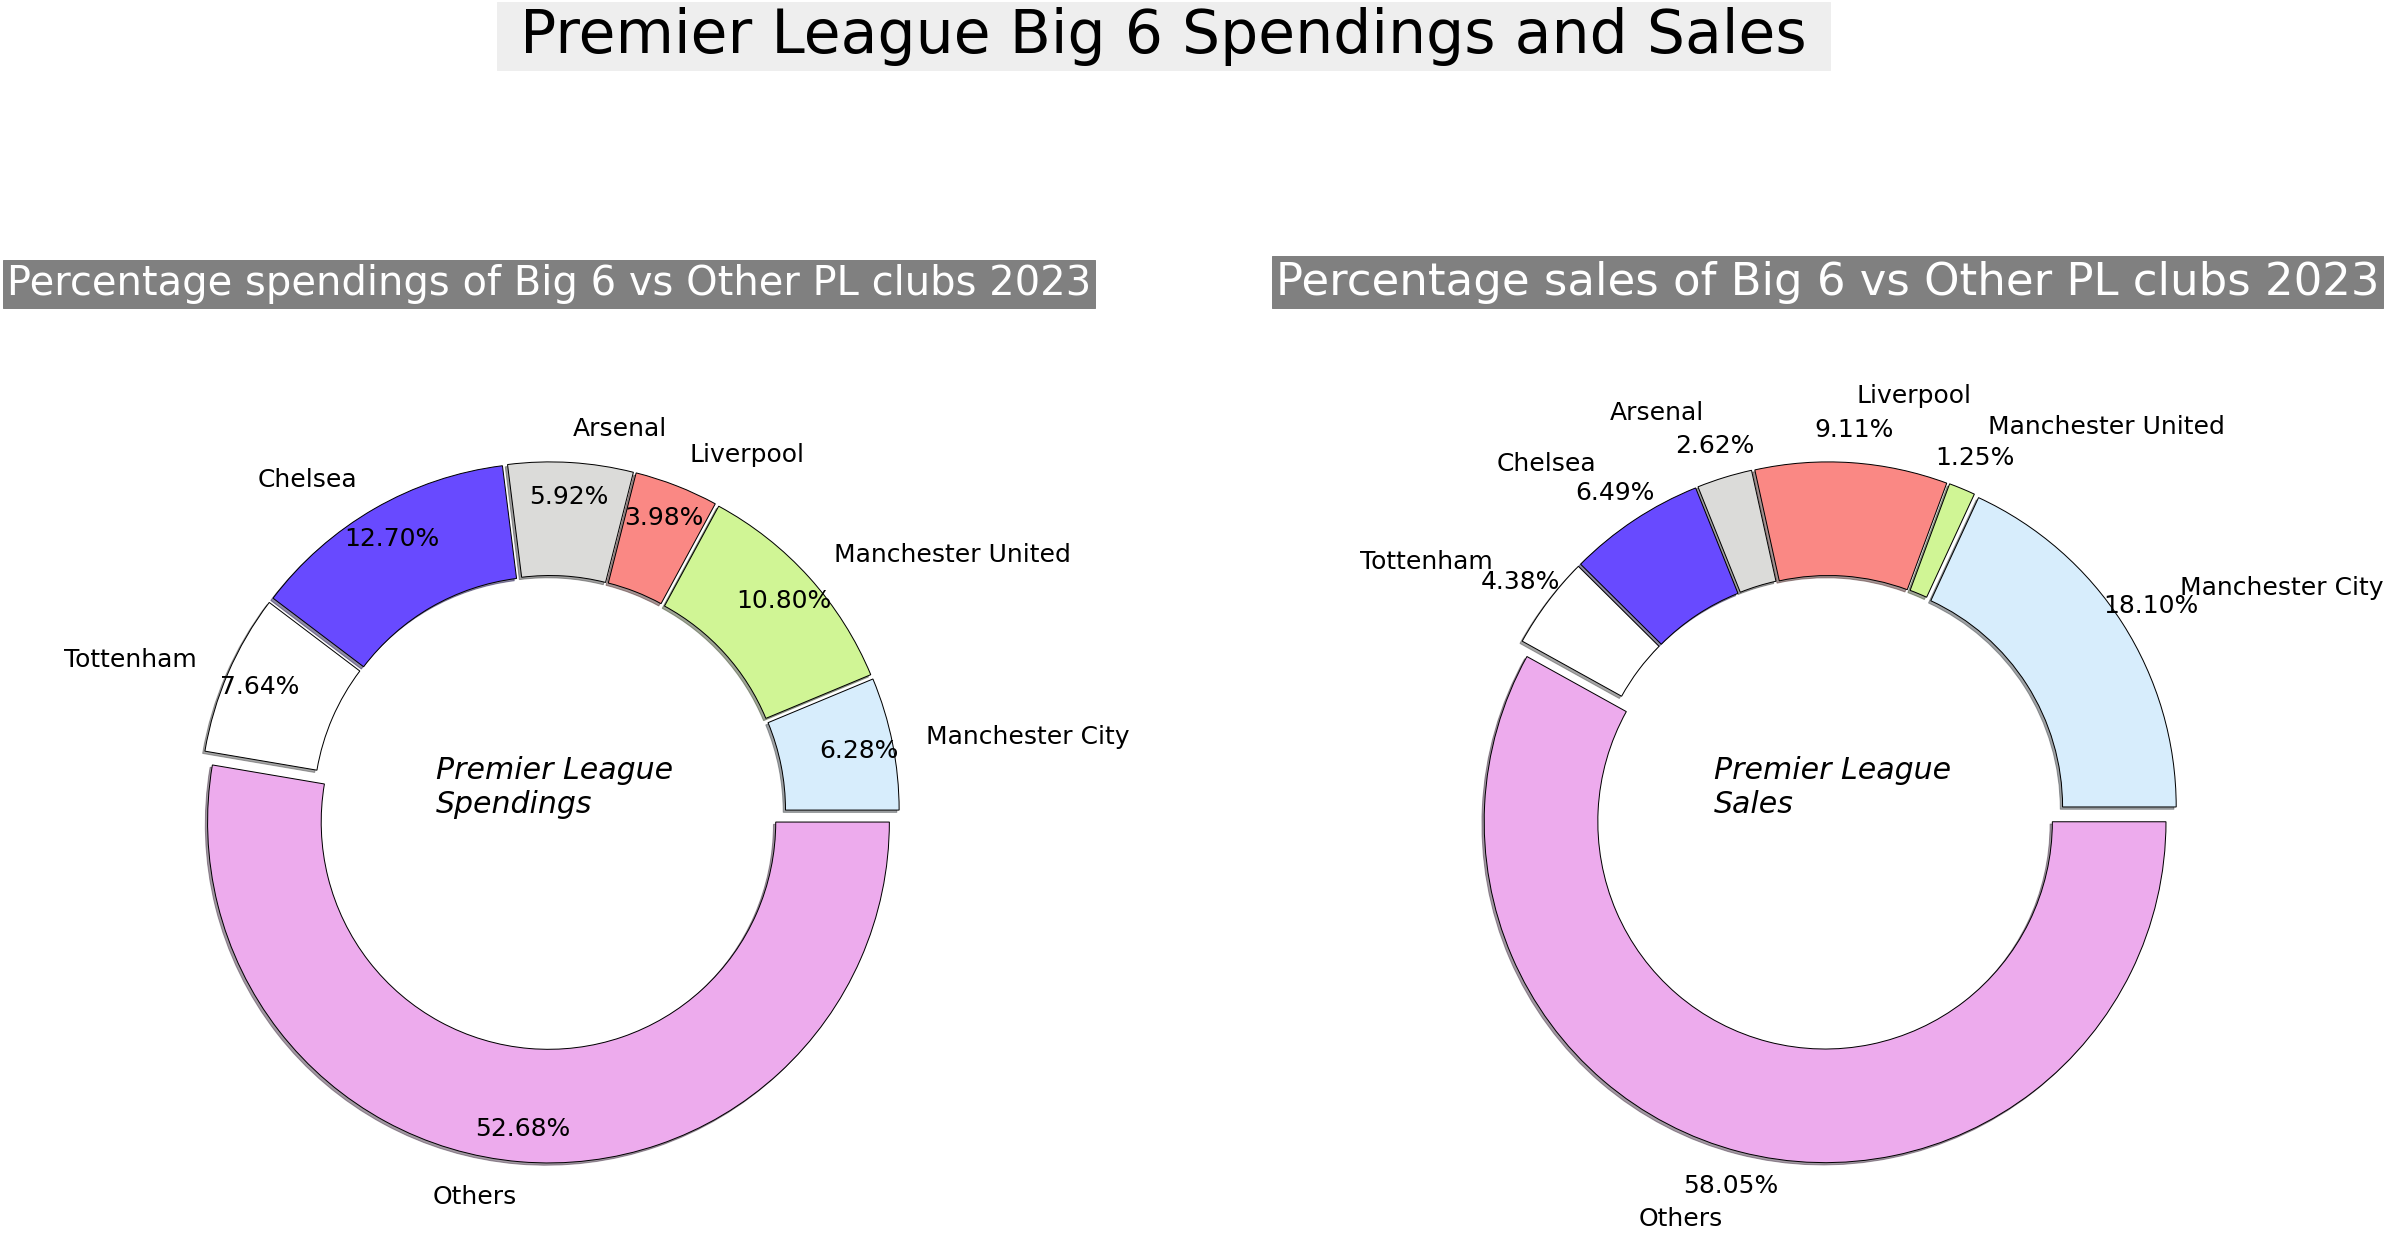

In [123]:
fig,ax = plt.subplots(1,2)
fig.suptitle(' Premier League Big 6 Spendings and Sales ',y=0.95, fontsize=60,backgroundcolor='#eeeeee')

# First Chart:

team_labels = table_2['Team']
percent_spendings = table_2['% of PL spendings']
colors = ['#d7edfc','#d0f595','#fa8884','#dbdbd9','#684aff','white','#edabed']

ax[0].pie(percent_spendings,labels=team_labels,autopct='%1.2f%%',pctdistance=0.9,colors=colors,
        rotatelabels=False,labeldistance=1.1,radius=3,frame=False,textprops={'fontsize': 25},
       explode=(0.08,0.08,0.08,0.08,0.08,0.08,0.09),shadow=True,
          wedgeprops=dict(width=1,linestyle='solid',edgecolor='black'))

ax[0].set_title('Percentage spendings of Big 6 vs Other PL clubs 2023',fontsize=40,color='white',
                backgroundcolor='grey',y=2.3)

ax[0].text(-1,0, "Premier League\nSpendings",fontsize=30,color='black',style='oblique')


#Second Chart:

team_labels = table_2['Team']
percent_sales = table_2['% of PL sales']
colors = ['#d7edfc','#d0f595','#fa8884','#dbdbd9','#684aff','white','#edabed']

ax[1].pie(percent_sales,labels=team_labels,autopct='%1.2f%%',pctdistance=1.1,colors=colors,
        rotatelabels=False,labeldistance=1.2,radius=3,frame=False,textprops={'fontsize': 25},
       explode=(0.08,0.08,0.08,0.08,0.08,0.08,0.09),shadow=True,
          wedgeprops=dict(width=1,linestyle='solid',edgecolor='black'))

ax[1].set_title('Percentage sales of Big 6 vs Other PL clubs 2023',fontsize=45,color='white',
                backgroundcolor='grey',y=2.3)

ax[1].text(-1,0, "Premier League\nSales",fontsize=30,color='black',style='oblique')


fig.set_figwidth(28)
fig.set_figheight(25)
plt.subplots_adjust(wspace=3.5)



plt.savefig('PL spendings and sales.pdf',facecolor='white',pad_inches=2,bbox_inches='tight')
plt.show() #Always write plt.show() AFTER savefig.


In [120]:
league_table.head(10)

,Pos,Team,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,GF/MP,GA/MP
0,1,Arsenal,19,16,2,1,45,16,29,50,2.63,37.3,17.0,20.3,1.07,2.368,0.842
1,2,Manchester City,20,14,3,3,53,20,33,45,2.25,41.4,15.6,25.8,1.29,2.650,1.000
2,3,Newcastle Utd,20,10,9,1,33,11,22,39,1.95,32.8,17.7,15.1,0.75,1.650,0.550
3,4,Manchester Utd,20,12,3,5,32,25,7,39,1.95,29.6,23.5,6.0,0.30,1.600,1.250
4,5,Tottenham,21,11,3,7,40,31,9,36,1.71,30.5,25.5,5.0,0.24,1.905,1.476
5,6,Brighton,19,9,4,6,37,27,10,31,1.63,29.1,23.9,5.2,0.27,1.947,1.421
6,7,Fulham,21,9,4,8,32,30,2,31,1.48,28.5,35.4,-7.0,-0.33,1.524,1.429
7,8,Brentford,20,7,9,4,32,28,4,30,1.50,27.4,25.7,1.7,0.09,1.600,1.400
8,9,Liverpool,19,8,5,6,34,25,9,29,1.53,33.5,27.1,6.4,0.34,1.789,1.316
9,10,Chelsea,20,8,5,7,22,21,1,29,1.45,23.8,26.4,-2.5,-0.13,1.100,1.050


As can be seen from the graphs, the Big6 has spent almost equal to the other 14 teams combined in the transfer market. The top 5 of the table has 4 of the 6 clubs analyzed, considering poor form of Liverpool and Chelsea. 

If the pattern continues, the PL will be at risk of being the monopoly of the Big6.